
Naive Bayes Accuracy: 0.9796
                  precision    recall  f1-score   support

     alt.atheism       1.00      0.99      0.99       229
   comp.graphics       0.96      0.98      0.97       305
rec.sport.hockey       0.99      0.99      0.99       287
       sci.space       0.98      0.96      0.97       307

        accuracy                           0.98      1128
       macro avg       0.98      0.98      0.98      1128
    weighted avg       0.98      0.98      0.98      1128


Logistic Regression Accuracy: 0.9743
                  precision    recall  f1-score   support

     alt.atheism       1.00      0.97      0.99       229
   comp.graphics       0.93      1.00      0.96       305
rec.sport.hockey       1.00      0.98      0.99       287
       sci.space       0.99      0.94      0.97       307

        accuracy                           0.97      1128
       macro avg       0.98      0.97      0.98      1128
    weighted avg       0.98      0.97      0.97      1128

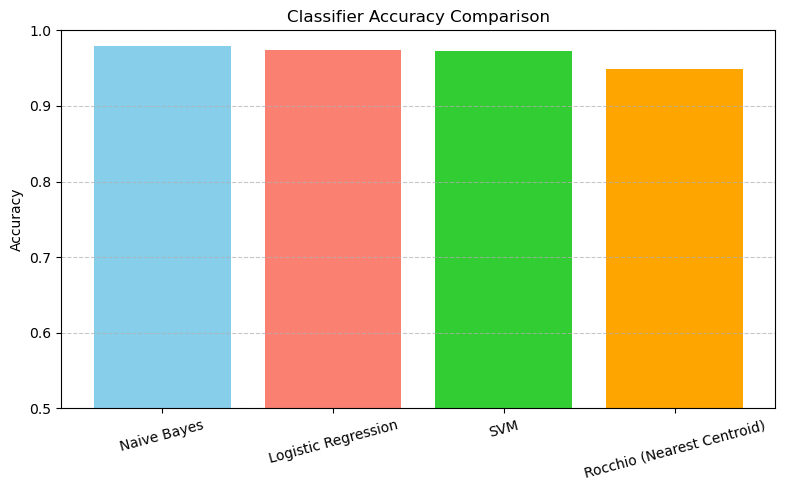

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Load dataset (selecting 4 categories for clarity)
categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'rec.sport.hockey']
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# 2. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.data)
y = data.target

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Define classifiers
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Rocchio (Nearest Centroid)": NearestCentroid()
}

# 5. Train and evaluate models
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=data.target_names))

# 6. Plot comparison
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'salmon', 'limegreen', 'orange'])
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
